In [1]:
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import KBinsDiscretizer
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score


In [2]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('heart_disease_uci.csv')

# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.drop(['id','dataset','ca','thal'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  num       920 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 86.4+ KB


In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,0


<Axes: xlabel='age', ylabel='Count'>

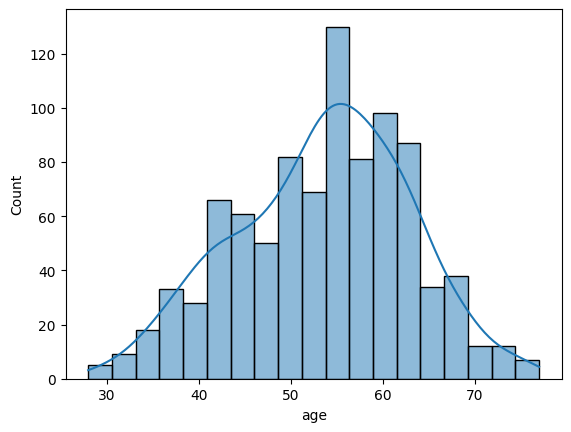

In [5]:
sns.histplot(df['age'], kde=True)

In [6]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [7]:
df['sex']=df['sex'].map({"Female":0,"Male":1})

In [8]:
df["cp"].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [9]:
df["cp"] = df["cp"].map({"typical angina":1,"atypical angina":2,"non-anginal":3,"asymptomatic":4})

In [10]:
df["restecg"].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [11]:
df["restecg"] = df["restecg"].map({"normal":1,"st-t abnormality":2,"lv hypertrophy":3})

In [12]:
df["exang"] = df["exang"].replace({True: 1, False: 0})

C:\Users\ameyk\AppData\Local\Temp\ipykernel_25416\3024959640.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["exang"] = df["exang"].replace({True: 1, False: 0})


In [13]:
df["slope"].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

In [14]:
df["slope"] = df["slope"].map({"upsloping":0,"downsloping":1,"flat":2})

In [15]:
df["fbs"] = df["fbs"].replace({True: 1, False: 0})

C:\Users\ameyk\AppData\Local\Temp\ipykernel_25416\2144484417.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["fbs"] = df["fbs"].replace({True: 1, False: 0})


In [16]:
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age','slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']


In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,1,1,145.0,233.0,1.0,3.0,150.0,0.0,2.3,1.0,0
1,67,1,4,160.0,286.0,0.0,3.0,108.0,1.0,1.5,2.0,2
2,67,1,4,120.0,229.0,0.0,3.0,129.0,1.0,2.6,2.0,1
3,37,1,3,130.0,250.0,0.0,1.0,187.0,0.0,3.5,1.0,0
4,41,0,2,130.0,204.0,0.0,3.0,172.0,0.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,4,127.0,333.0,1.0,2.0,154.0,0.0,0.0,NaN,1
916,62,1,1,NaN,139.0,0.0,2.0,NaN,NaN,NaN,NaN,0
917,55,1,4,122.0,223.0,1.0,2.0,100.0,0.0,0.0,NaN,2
918,58,1,4,NaN,385.0,1.0,3.0,NaN,NaN,NaN,NaN,0


In [18]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']

In [19]:
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [20]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)


slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
dtype: int64

In [21]:
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    
    if col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 14.099421965317918 

RMSE = 17.893577851388454 

R2 = 0.0002942926038641547 

Missing Values chol : 3.26%


C:\Users\ameyk\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ameyk\AppData\Local\Temp\ipykernel_25416\3117282253.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[passed_col] = rf_regressor.predict(X)


MAE = 67.9144382022472 

RMSE = 88.69775403779012 

R2 = 0.3767763988941816 

Missing Values fbs : 9.78%
MAE = 0.2694578313253012 

RMSE = 0.40285651725394234 

R2 = 0.02461151581243204 

Missing Values restecg : 0.22%


C:\Users\ameyk\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ameyk\AppData\Local\Temp\ipykernel_25416\3117282253.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[passed_col] = rf_regressor.predict(X)
C:\Users\ameyk\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ameyk\AppData\Local\Temp\ipykern

MAE = 0.6675 

RMSE = 0.7772519875651094 

R2 = -0.048716033430754146 

Missing Values thalch : 5.98%
MAE = 17.564624277456648 

RMSE = 22.08819293314922 

R2 = 0.29056977464501066 

Missing Values exang : 5.98%


C:\Users\ameyk\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ameyk\AppData\Local\Temp\ipykernel_25416\3117282253.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[passed_col] = rf_regressor.predict(X)
C:\Users\ameyk\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ameyk\anaconda3\envs\notebook\Li

MAE = 0.2983236994219653 

RMSE = 0.3839760047897984 

R2 = 0.3786737397916079 

Missing Values oldpeak : 6.74%
MAE = 0.5965290697674418 

RMSE = 0.7979374028313306 

R2 = 0.3934095180865286 

Missing Values slope : 33.59%


C:\Users\ameyk\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ameyk\AppData\Local\Temp\ipykernel_25416\3117282253.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[passed_col] = rf_regressor.predict(X)
C:\Users\ameyk\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ameyk\anaconda3\envs\notebook\Li

MAE = 0.6501626016260164 

RMSE = 0.807502926068851 

R2 = 0.24440636488970569 



C:\Users\ameyk\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ameyk\AppData\Local\Temp\ipykernel_25416\3117282253.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[passed_col] = rf_regressor.predict(X)


In [22]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [23]:
df.shape

(920, 12)

In [24]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,1,1,145.00,233.0,1.0,3.0,150.00,0.00,2.300,1.00,0
1,67,1,4,160.00,286.0,0.0,3.0,108.00,1.00,1.500,2.00,2
2,67,1,4,120.00,229.0,0.0,3.0,129.00,1.00,2.600,2.00,1
3,37,1,3,130.00,250.0,0.0,1.0,187.00,0.00,3.500,1.00,0
4,41,0,2,130.00,204.0,0.0,3.0,172.00,0.00,1.400,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,4,127.00,333.0,1.0,2.0,154.00,0.00,0.000,0.67,1
916,62,1,1,137.54,139.0,0.0,2.0,147.63,0.24,2.049,1.25,0
917,55,1,4,122.00,223.0,1.0,2.0,100.00,0.00,0.000,1.61,2
918,58,1,4,152.77,385.0,1.0,3.0,147.10,0.46,1.979,0.99,0


In [25]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for each numerical feature
numerical_columns = ['age', 'restecg', 'chol', 'thalch', 'oldpeak']
outliers = {}
for column in numerical_columns:
    outliers[column] = detect_outliers_iqr(df, column).shape[0]

print("Outliers detected per column:", outliers)

Outliers detected per column: {'age': 0, 'restecg': 0, 'chol': 185, 'thalch': 2, 'oldpeak': 7}


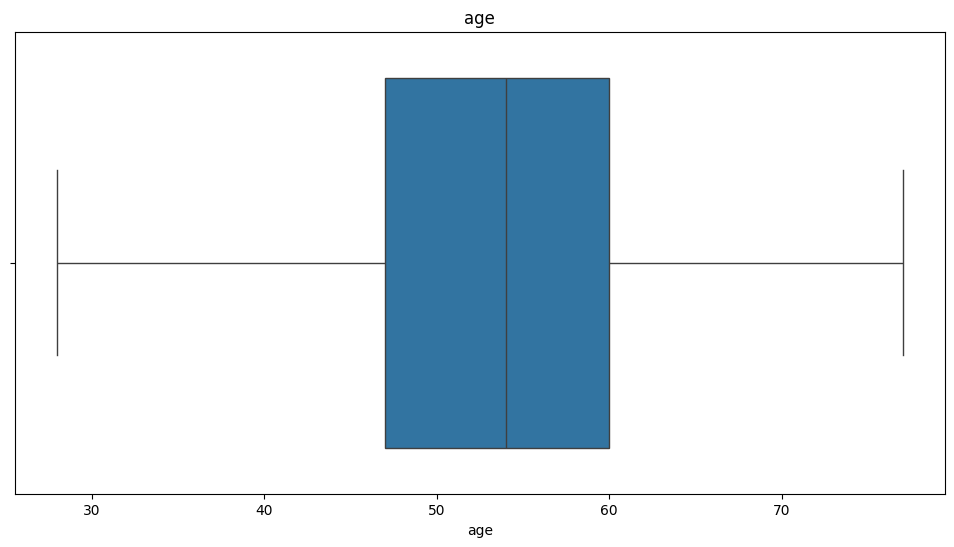

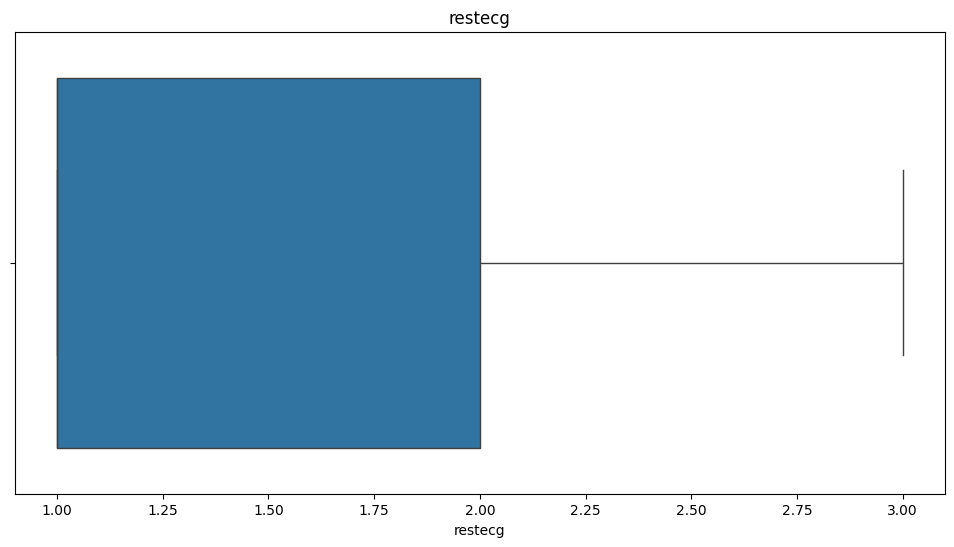

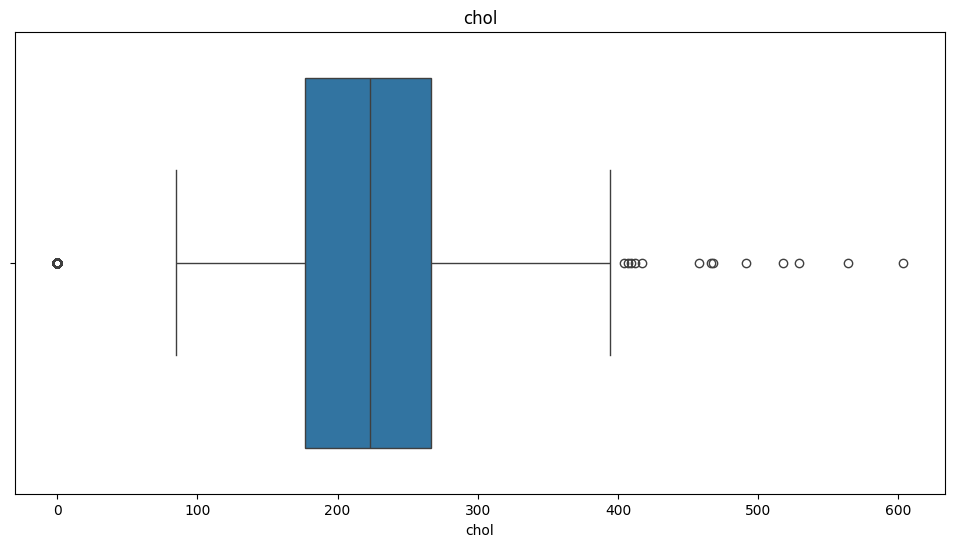

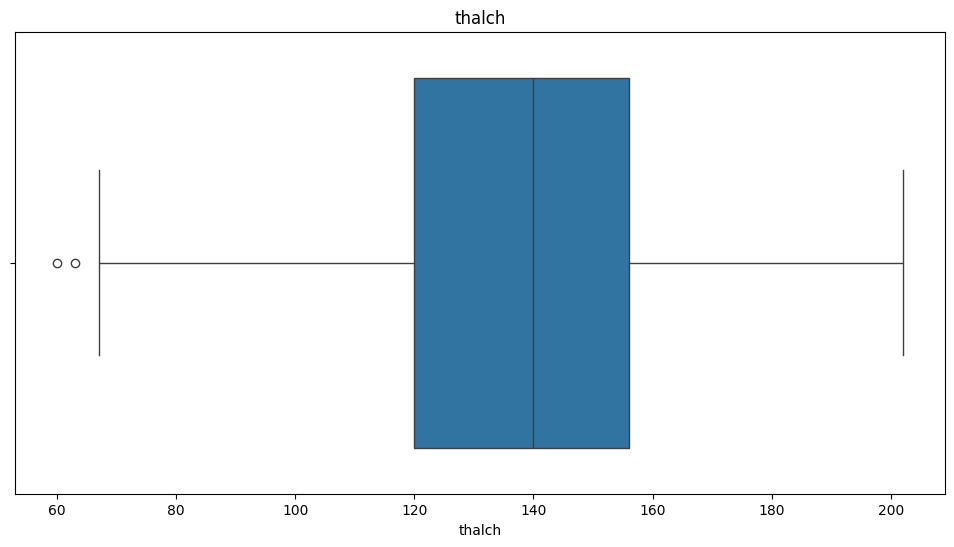

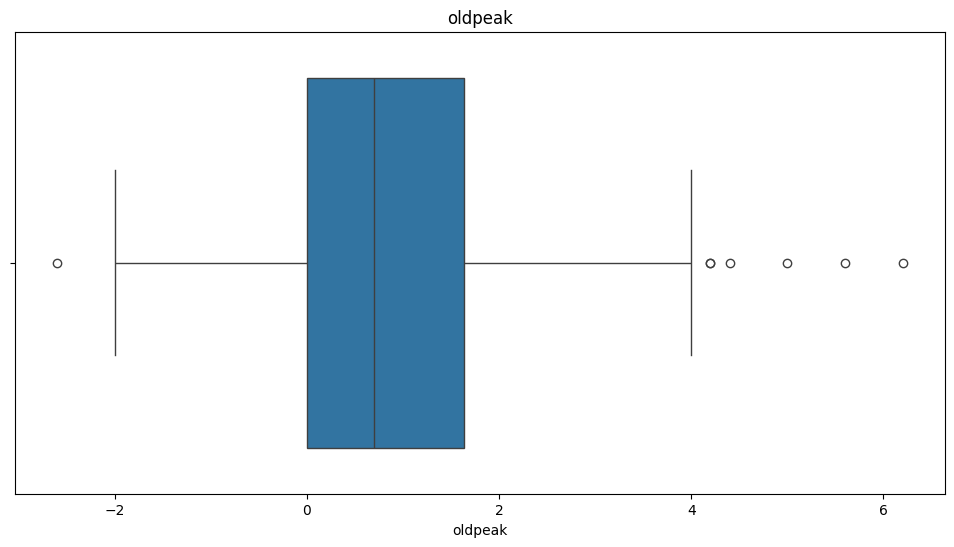

In [26]:
columns = ['age', 'restecg', 'chol', 'thalch', 'oldpeak']

for column in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.show()

In [27]:
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

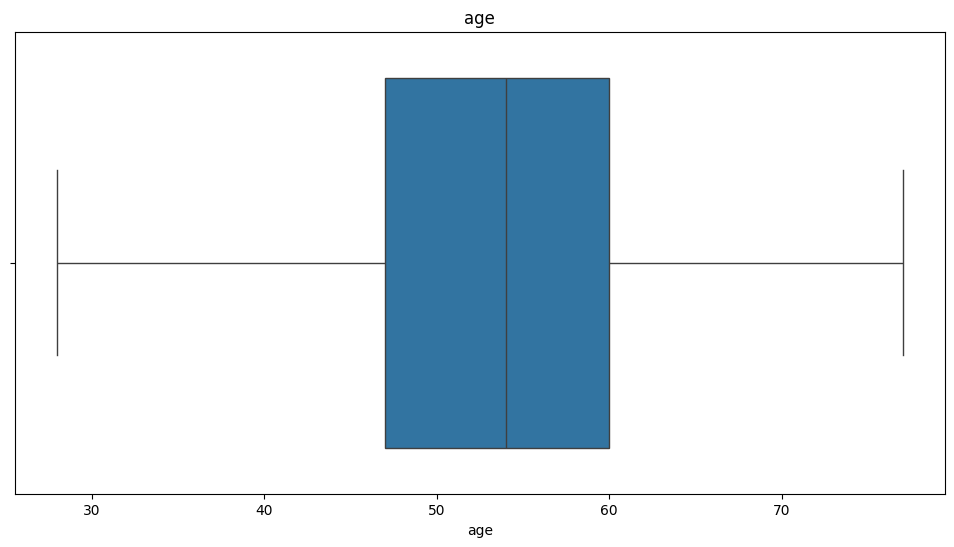

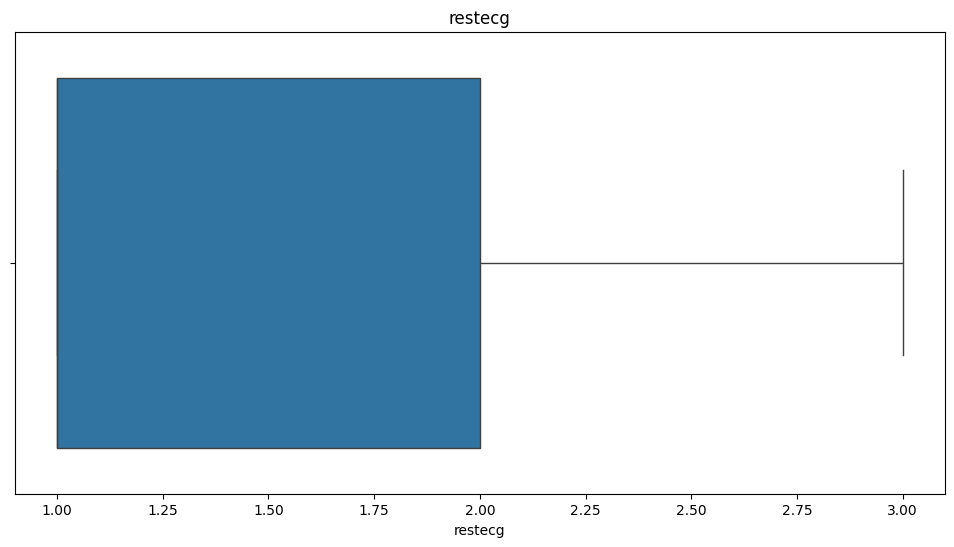

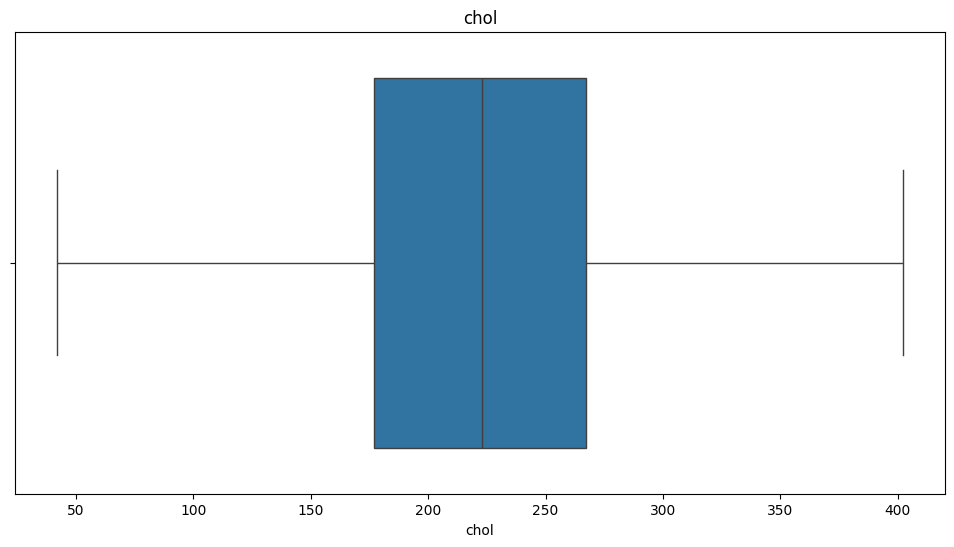

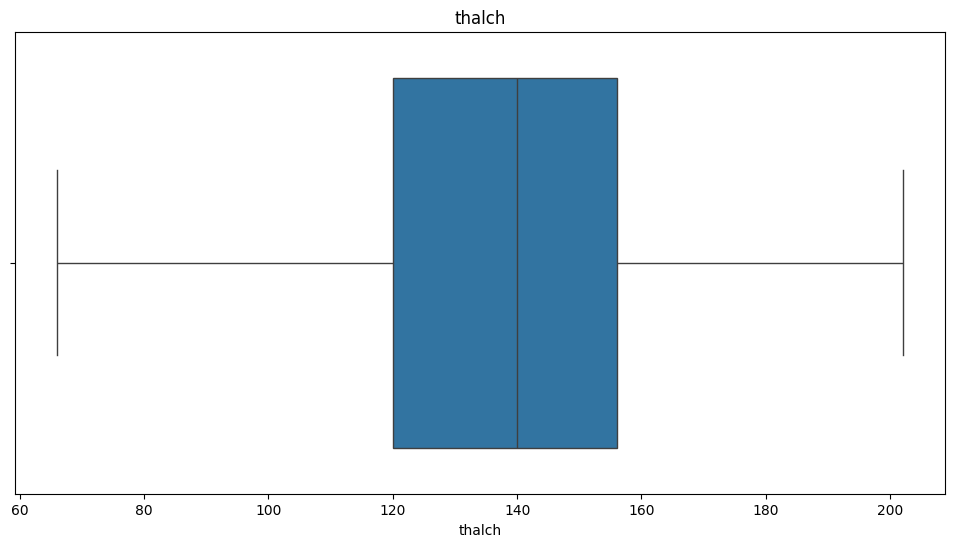

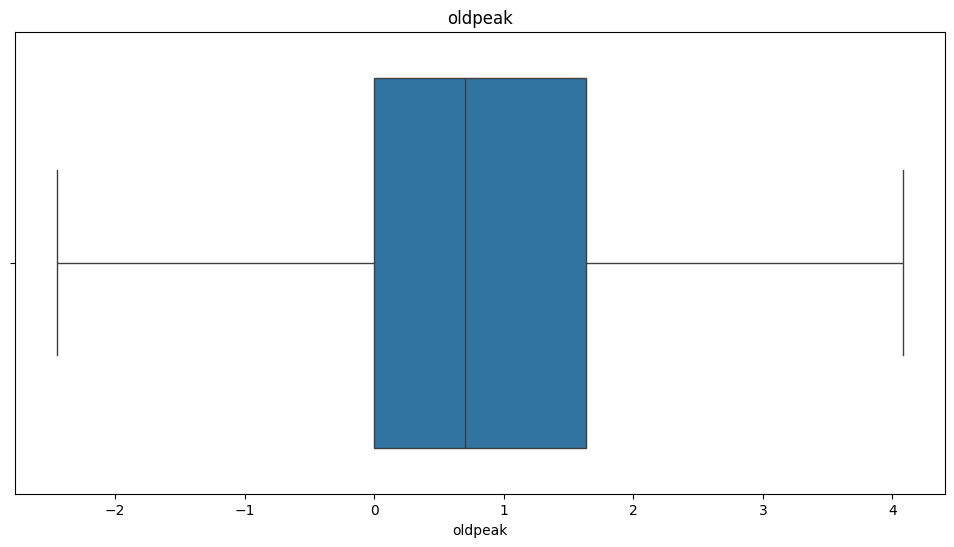

In [28]:
columns =['age', 'restecg', 'chol', 'thalch', 'oldpeak']


for column in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.show()

In [29]:
X = df.drop(columns='num', axis=1)
Y = df['num']

In [30]:
print(X)

     age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   1    145.00  233.0  1.0      3.0  150.00   0.00    2.300   
1     67    1   4    160.00  286.0  0.0      3.0  108.00   1.00    1.500   
2     67    1   4    120.00  229.0  0.0      3.0  129.00   1.00    2.600   
3     37    1   3    130.00  250.0  0.0      1.0  187.00   0.00    3.500   
4     41    0   2    130.00  204.0  0.0      3.0  172.00   0.00    1.400   
..   ...  ...  ..       ...    ...  ...      ...     ...    ...      ...   
915   54    0   4    127.00  333.0  1.0      2.0  154.00   0.00    0.000   
916   62    1   1    137.54  139.0  0.0      2.0  147.63   0.24    2.049   
917   55    1   4    122.00  223.0  1.0      2.0  100.00   0.00    0.000   
918   58    1   4    152.77  385.0  1.0      3.0  147.10   0.46    1.979   
919   62    1   2    120.00  254.0  0.0      3.0   93.00   1.00    0.000   

     slope  
0     1.00  
1     2.00  
2     2.00  
3     1.00  
4     0.00  
..     ..

In [31]:
print(Y)

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(920, 11) (736, 11) (184, 11)


In [34]:
model_xg = XGBClassifier()
model_xg.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
model_xg.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
model_xg.score(X_train, Y_train)

1.0

In [37]:
model_xg.score(X_test, Y_test)

0.5434782608695652

In [38]:
y_pred = model_xg.predict(X_test)

In [39]:
acc = accuracy_score(Y_test, y_pred)
print(acc)


0.5434782608695652


In [40]:
Age = int(input("Enter"))
Sex = int(input("Enter"))
cp = int(input("Enter "))
trestbps = int(input("Enter"))
chol = int(input("Enter"))
fbs = int(input("Enter"))
restecg = int(input("Enter"))
thalch = int(input("Enter"))
exang = int(input("Enter"))
oldpeak = int(input("Enter"))
slope  = float(input("Enter"))

input_data = (Age,Sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_xg.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    print('The Person does not have a Heart Disease')
elif(prediction[0]== 1):
    print("Moderate")
elif(prediction[0]==2):
    print('Moderately high')

else:
    print('The Person has Heart Disease')


Enter55
Enter1
Enter 4
Enter122
Enter223
Enter1
Enter2
Enter100
Enter00
Enter0
Enter1.79
[2]
Moderately high
